In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm

G = nx.read_edgelist('web-Stanford.txt', create_using=nx.DiGraph)
print(nx.info(G))

C:\Users\Anika\AppData\Local\Temp\ipykernel_22296\3516960226.py:7: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


DiGraph with 281903 nodes and 2312497 edges


In [2]:
#remove dandling nodes
dangling_nodes = []
for node in G.nodes:
    if G.out_degree(node) == 0:
        dangling_nodes.append(node)
        
while dangling_nodes: 
    G.remove_nodes_from(dangling_nodes)
    dangling_nodes = [node for node in G.nodes if G.out_degree(node) == 0]
    
#removing isolated nodes
G.remove_nodes_from(list(nx.isolates(G)))

#After removing the dangling and isolated nodes, the graph has following nodes and edges
print(nx.info(G))

DiGraph with 281115 nodes and 2309731 edges


C:\Users\Anika\AppData\Local\Temp\ipykernel_22296\2938567354.py:15: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [3]:
gw = max(nx.weakly_connected_components(G), key=len)
wcc = G.subgraph(gw)

# Number of nodes in the WCC
wcc_node_count = wcc.number_of_nodes()

# Number of edges in the WCC
wcc_edge_count = wcc.number_of_edges()

print("Number of nodes in WCC: " + str(wcc_node_count))
print("Number of edges in WCC: " + str(wcc_edge_count))

Number of nodes in WCC: 254532
Number of edges in WCC: 2231860


In [4]:
gs = max(nx.strongly_connected_components(G), key=len)
scc = G.subgraph(gs)

# Number of nodes in the SCC
scc_node_count = scc.number_of_nodes()

# Number of edges in the SCC
scc_edge_count = scc.number_of_edges()

print("Number of nodes in SCC: " + str(scc_node_count))
print("Number of edges in SCC: " + str(scc_edge_count))

Number of nodes in SCC: 150532
Number of edges in SCC: 1576314


In [5]:
#Finding page ranks for WCC and SCC
pr_wcc = nx.pagerank(wcc, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)
pr_scc = nx.pagerank(scc, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)

In [6]:
# finding the correct m value for the BA graph
m = 1
ba_graph = nx.barabasi_albert_graph(wcc.number_of_nodes(), m, seed=1, initial_graph=None)

while ba_graph.number_of_edges() < wcc.number_of_edges():
    m += 1
    ba_graph = nx.barabasi_albert_graph(wcc.number_of_nodes(), m, seed=1, initial_graph=None) 

print(m)
print(ba_graph.number_of_edges())

9
2290707


In [7]:
#The random graph and BA graph
fast_random_graph = nx.fast_gnp_random_graph(wcc.number_of_nodes(), 0.00008, seed=1, directed=False)
ba_graph = nx.barabasi_albert_graph(wcc.number_of_nodes(), 9, seed=1, initial_graph=None)

In [8]:
# Finding page ranks for the random graph and BA graph
pr_fast_random_graph = nx.pagerank(fast_random_graph)
pr_ba_graph = nx.pagerank(ba_graph)

WCC Graph Degree Distribution


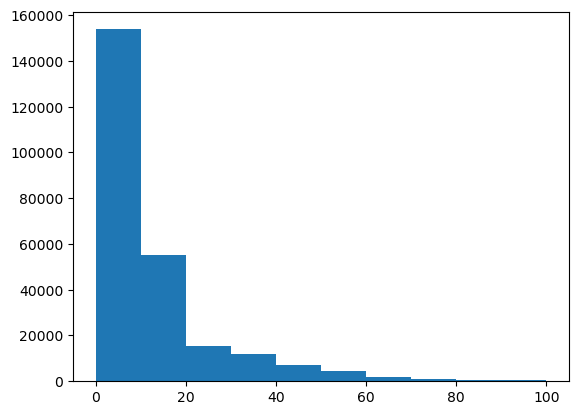

Fast Random Graph Degree Distribution


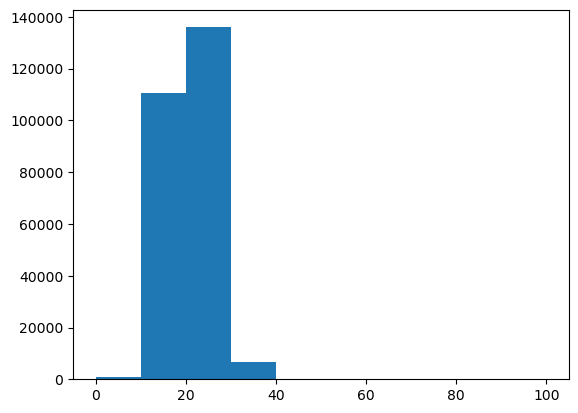

BA Graph Degree Distribution


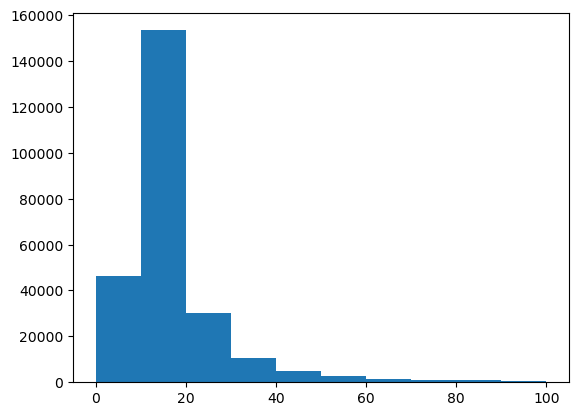

In [9]:
#Degree distribution for each graph
def plot_degree_dist(graph, s):
    print(s)
    degrees = [graph.degree(n) for n in graph.nodes()]
    plt.hist(degrees, range = [0,100])
    plt.show()

#plot degree distribution for the the 3 graph
plot_degree_dist(wcc, "WCC Graph Degree Distribution")
plot_degree_dist(fast_random_graph, "Fast Random Graph Degree Distribution")
plot_degree_dist(ba_graph, "BA Graph Degree Distribution")

In [10]:
#sorting the page rank vectors according to their page rank values
sorted_pr_wcc = {}
for key, value in sorted(pr_wcc.items(),  key=lambda item: item[1], reverse = True):
    sorted_pr_wcc[key] = value
    
sorted_pr_fast_random_graph = {}
for key, value in sorted(pr_fast_random_graph.items(),  key=lambda item: item[1], reverse = True):
    sorted_pr_fast_random_graph[key] = value
    
sorted_pr_ba_graph = {}
for key, value in sorted(pr_ba_graph.items(),  key=lambda item: item[1], reverse = True):
    sorted_pr_ba_graph[key] = value

In [11]:
#converting the dictionary values to numpy arrays 
arr_wcc = np.array(list(sorted_pr_wcc.values()))
arr_fr = np.array(list(sorted_pr_fast_random_graph.values()))
arr_ba = np.array(list(sorted_pr_ba_graph.values()))

In [12]:
#calculating cosine similarities
cosine_sim_wcc_random = np.dot(arr_wcc,arr_fr)/(norm(arr_wcc)*norm(arr_fr))
print("Cosine similarity between WCC and the Fast Random Graph is: " + str(cosine_sim_wcc_random))
cosine_sim_wcc_ba = np.dot(arr_wcc,arr_ba)/(norm(arr_wcc)*norm(arr_ba))
print("Cosine similarity between WCC and the BA Graph is: " + str(cosine_sim_wcc_ba))

Cosine similarity between WCC and the Fast Random Graph is: 0.10621941156062113
Cosine similarity between WCC and the BA Graph is: 0.6462315815038534


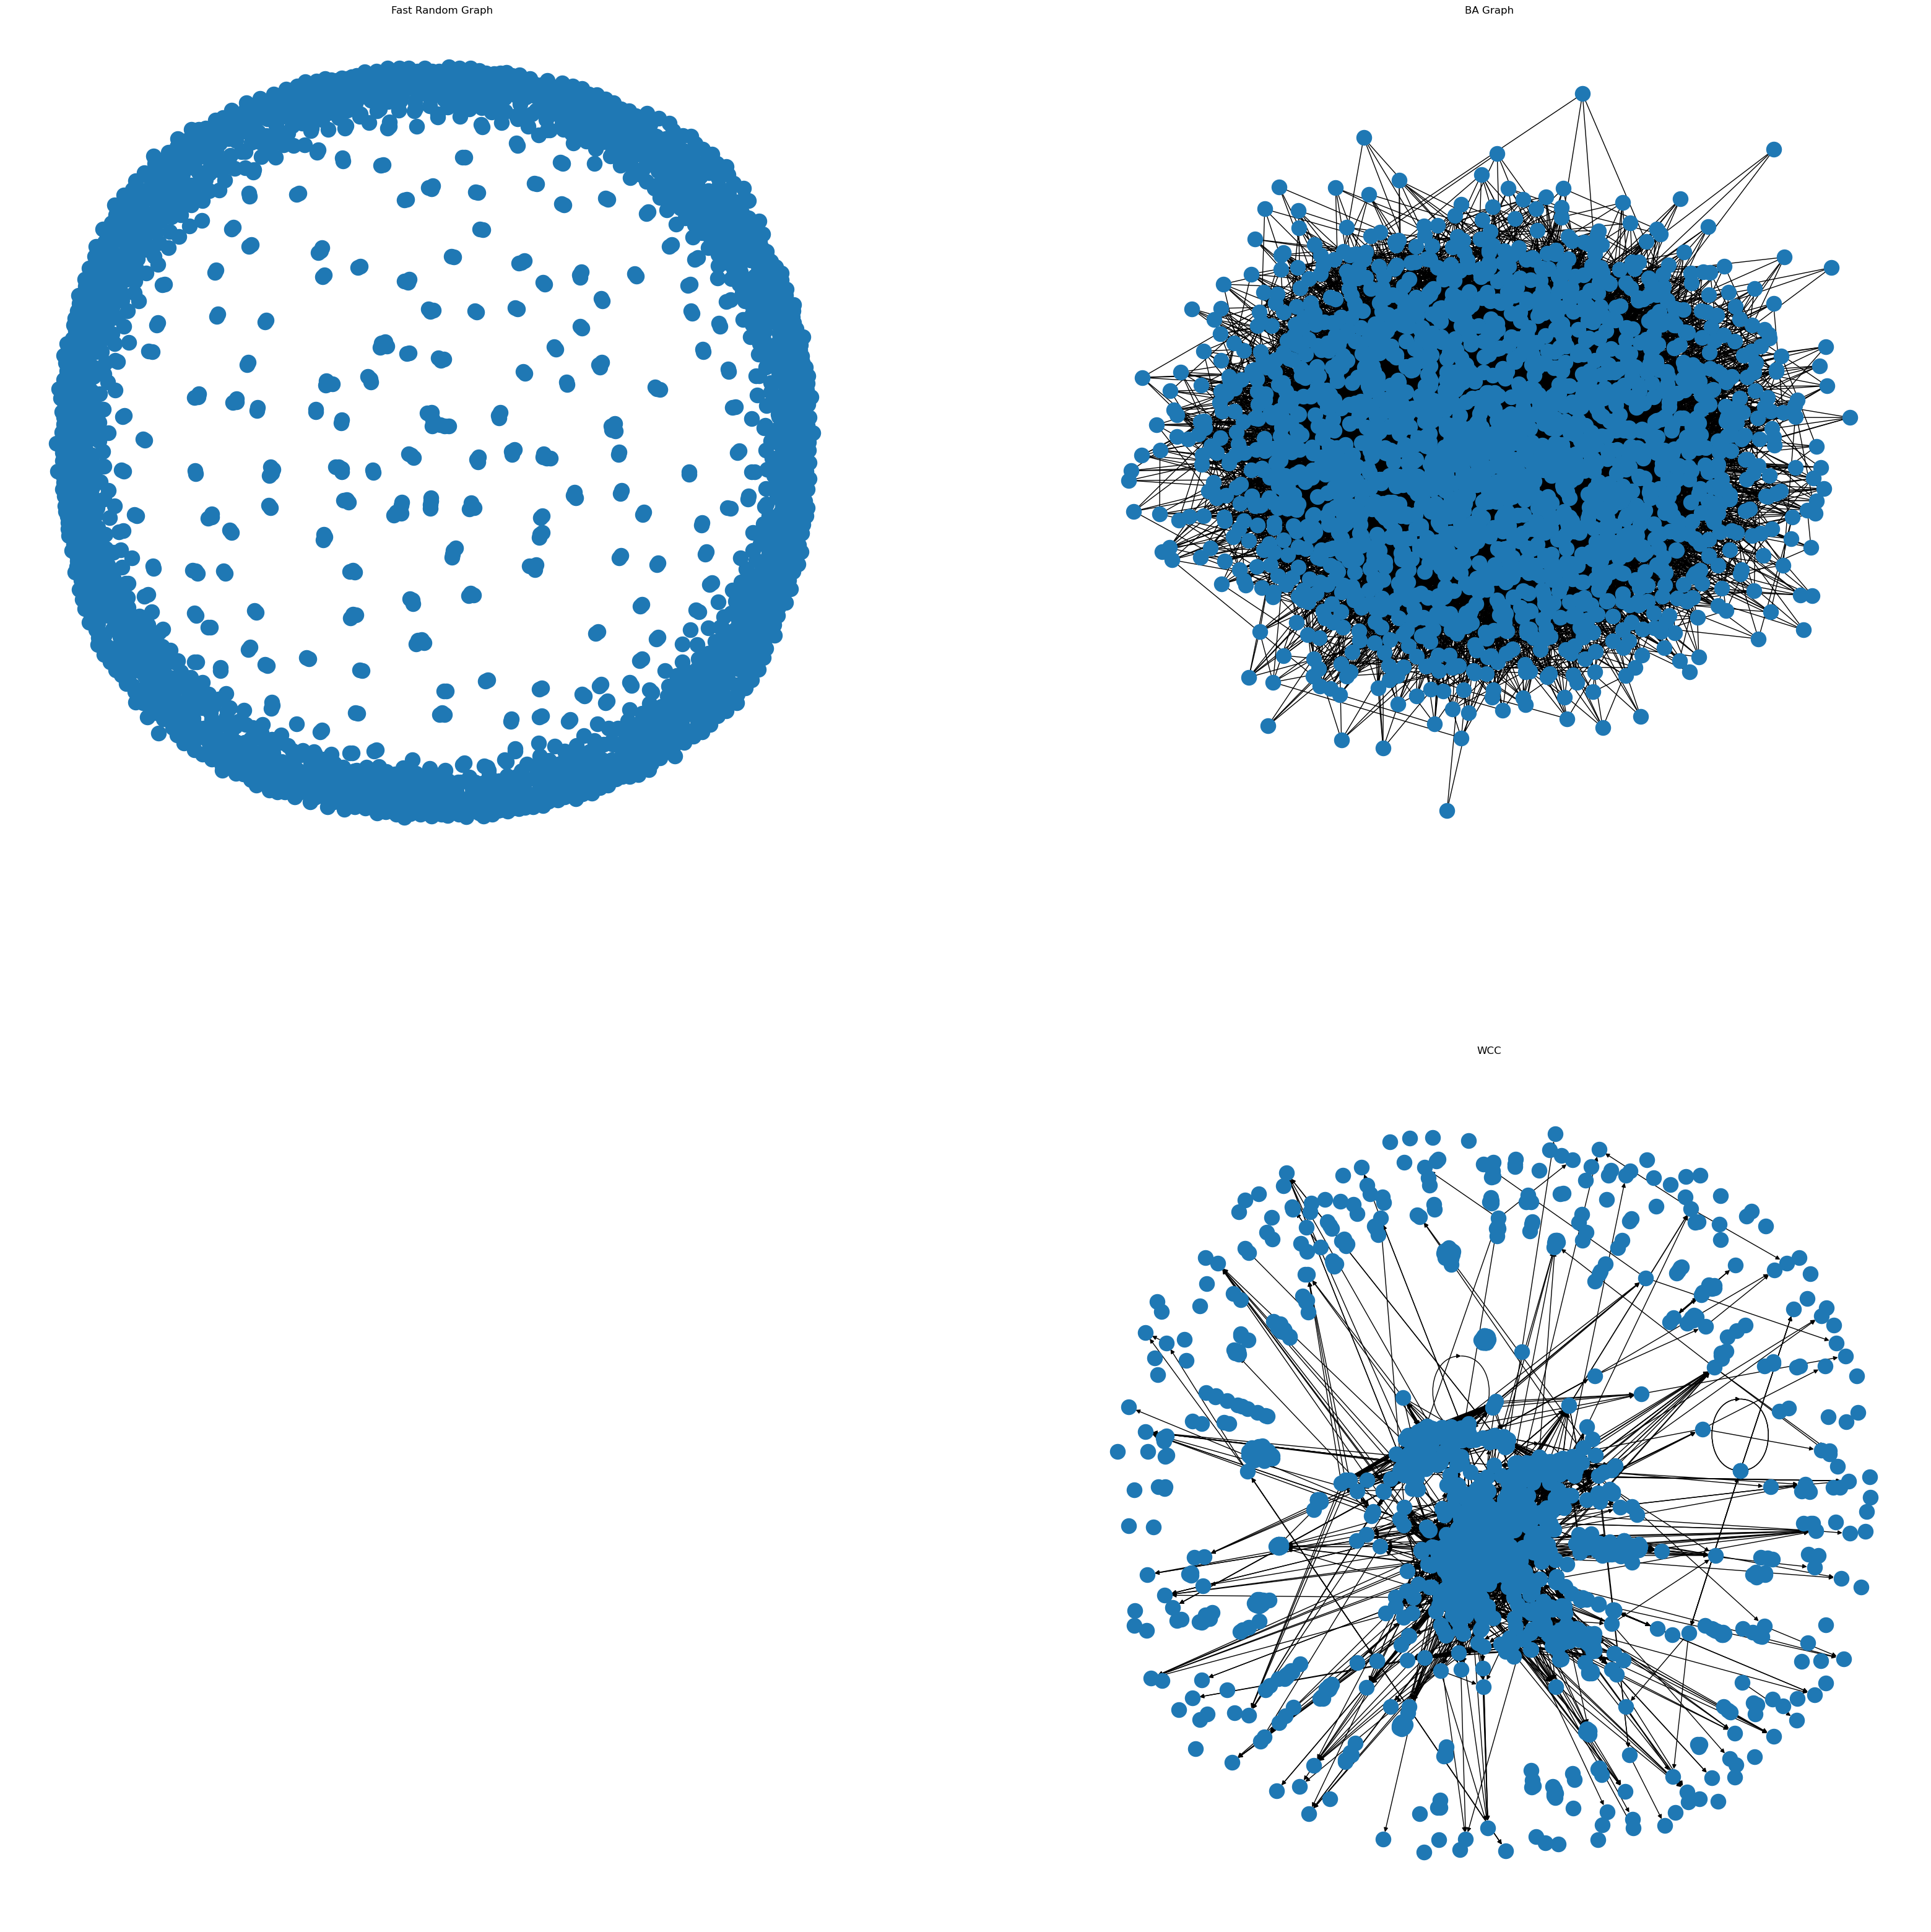

In [13]:
#Getting the top K values - K nodes with the highest page rank values
topk_wcc = list(sorted_pr_wcc.keys())[:2000]
topk_fr= list(sorted_pr_fast_random_graph.keys())[:2000]
topk_ba = list(sorted_pr_ba_graph.keys())[:2000]

#Creating subgraph from the largest WCC, Random Graph and BA graph
wcc_g_k = wcc.subgraph(topk_wcc)
frg_k = fast_random_graph.subgraph(topk_fr)
ba_g_k = ba_graph.subgraph(topk_ba)

#Creating the plot and plotting the 3 graphs
plt.figure(figsize=(40, 40))

plt.subplot(221).set_title("Fast Random Graph")
nx.draw(frg_k)

plt.subplot(222).set_title("BA Graph")
nx.draw(ba_g_k)

plt.subplot(224).set_title("WCC")
nx.draw(wcc_g_k)

plt.show()

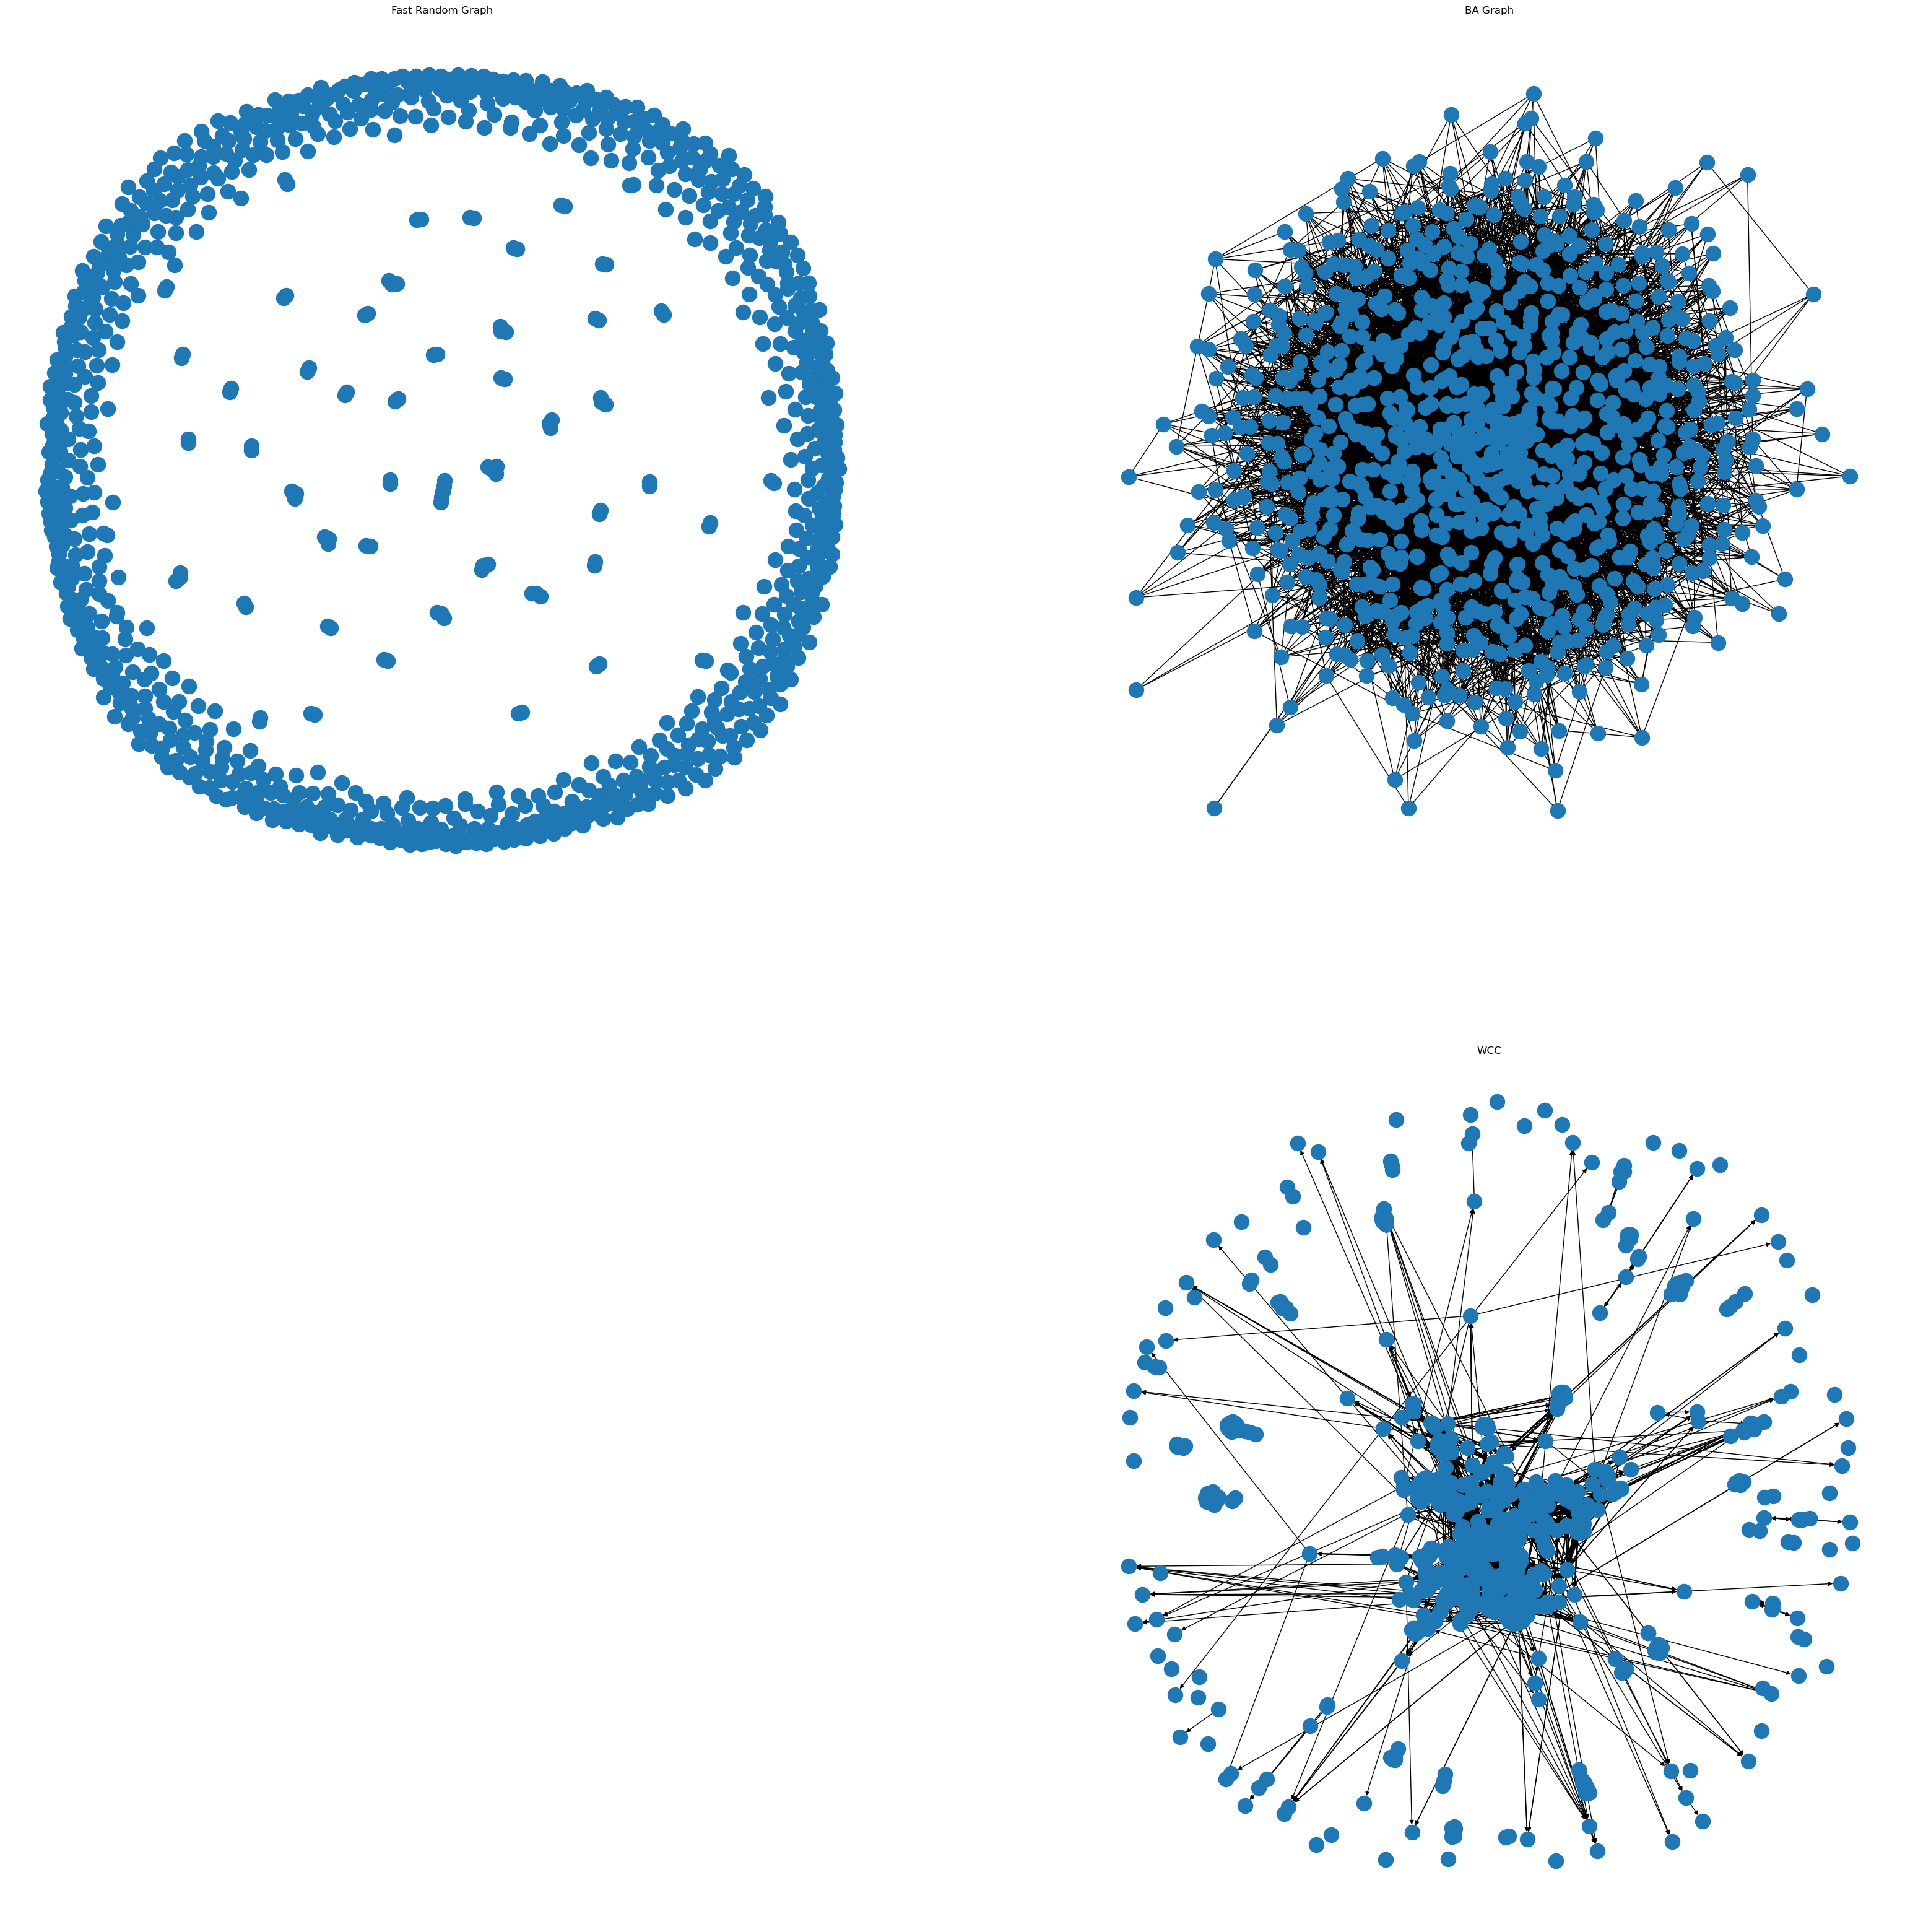

In [14]:
#Getting the top K values - K nodes with the highest page rank values
topk_wcc = list(sorted_pr_wcc.keys())[:1000]
topk_fr= list(sorted_pr_fast_random_graph.keys())[:1000]
topk_ba = list(sorted_pr_ba_graph.keys())[:1000]

#Creating subgraph from the largest WCC, Random Graph and BA graph
wcc_g_k = wcc.subgraph(topk_wcc)
frg_k = fast_random_graph.subgraph(topk_fr)
ba_g_k = ba_graph.subgraph(topk_ba)

#Creating the plot and plotting the 3 graphs
plt.figure(figsize=(40, 40))

plt.subplot(221).set_title("Fast Random Graph")
nx.draw(frg_k)

plt.subplot(222).set_title("BA Graph")
nx.draw(ba_g_k)

plt.subplot(224).set_title("WCC")
nx.draw(wcc_g_k)

plt.show()

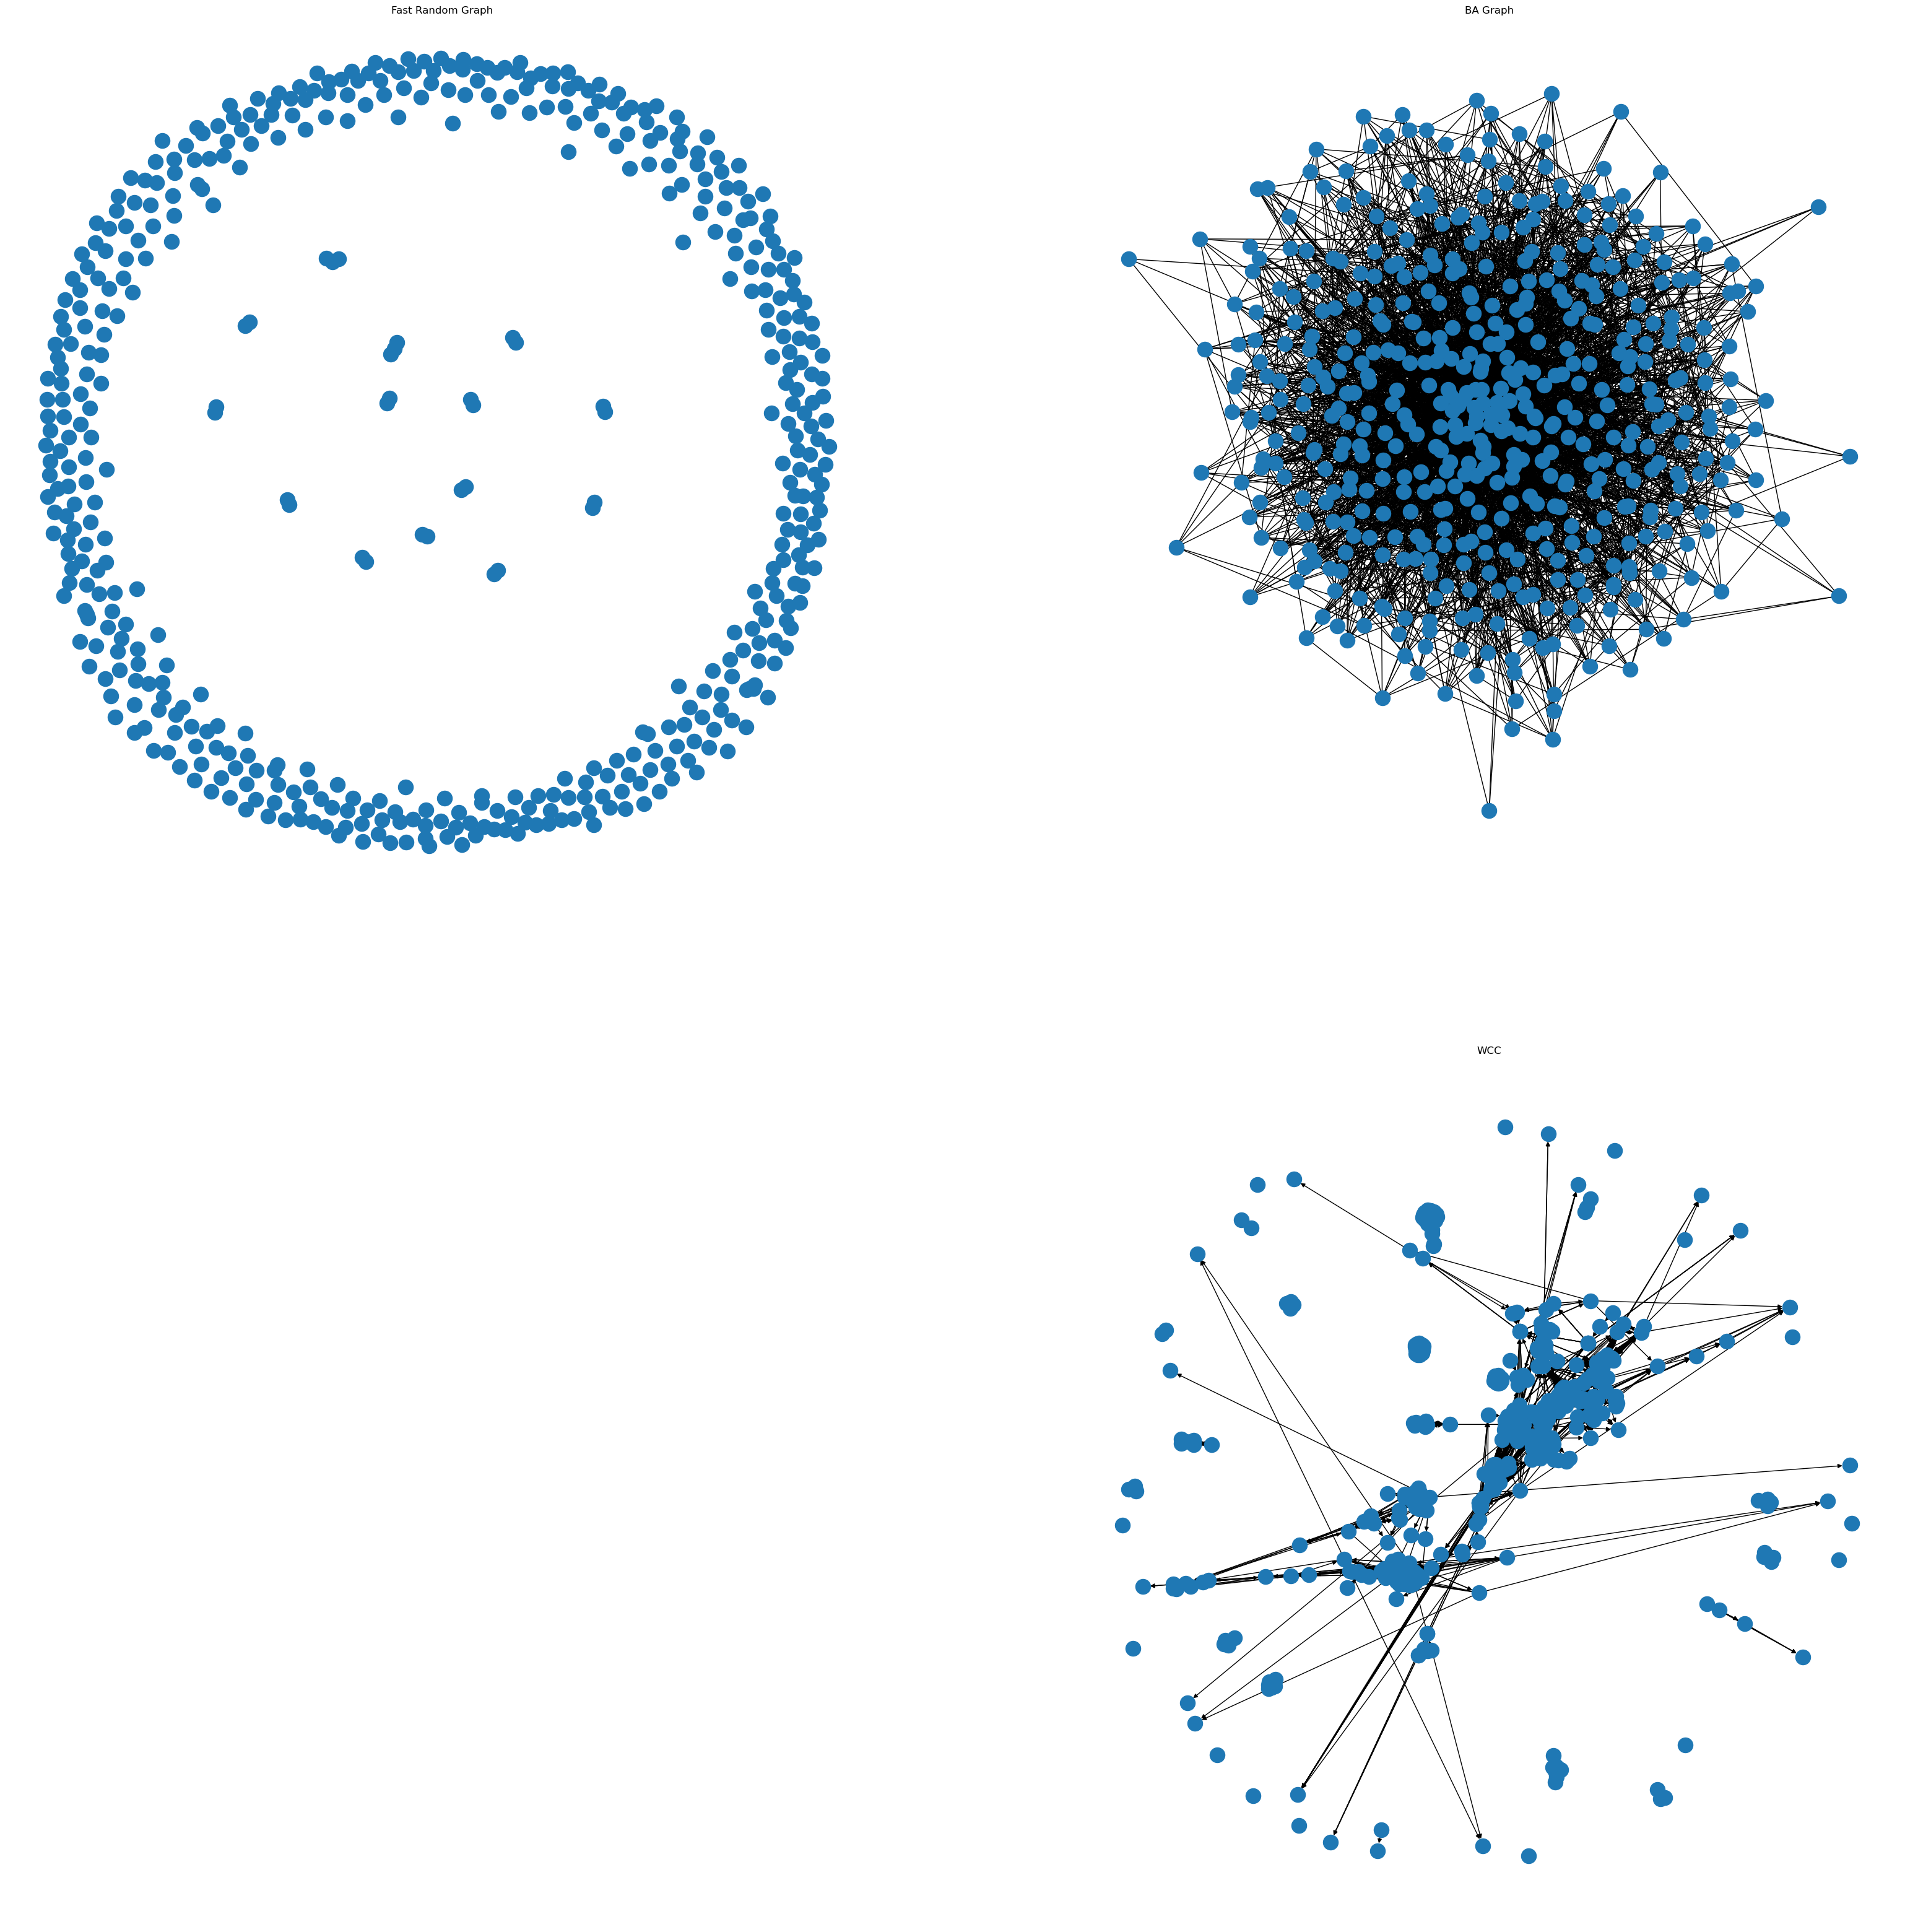

In [15]:
#Getting the top K values - K nodes with the highest page rank values
topk_wcc = list(sorted_pr_wcc.keys())[:500]
topk_fr= list(sorted_pr_fast_random_graph.keys())[:500]
topk_ba = list(sorted_pr_ba_graph.keys())[:500]

#Creating subgraph from the largest WCC, Random Graph and BA graph
wcc_g_k = wcc.subgraph(topk_wcc)
frg_k = fast_random_graph.subgraph(topk_fr)
ba_g_k = ba_graph.subgraph(topk_ba)

#Creating the plot and plotting the 3 graphs
plt.figure(figsize=(40, 40))

plt.subplot(221).set_title("Fast Random Graph")
nx.draw(frg_k)

plt.subplot(222).set_title("BA Graph")
nx.draw(ba_g_k)

plt.subplot(224).set_title("WCC")
nx.draw(wcc_g_k)

plt.show()

In [16]:
#Calculating the Transitivity for each graph
wcc_t = nx.transitivity(wcc)
print("Transitivity of the largest WCC graph: " + str(wcc_t))

fr_t = nx.transitivity(fast_random_graph)
print("Transitivity of the fast Random Graph: " + str(fr_t))

ba_t = nx.transitivity(ba_graph)
print("Transitivity of the BA graph: " + str(ba_t))

Transitivity of the largest WCC graph: 0.3547436522786994
Transitivity of the fast Random Graph: 7.914945270314145e-05
Transitivity of the BA graph: 0.0006090497087519401


In [23]:
#Calculating the clustering coeeficient for each graph
#WCC is converted to undirected to make computation faster

wcc_undirected = wcc.to_undirected()
wcc_cc = nx.clustering(wcc_undirected, nodes=None, weight=None)
average_wcc_cc = sum(wcc_cc.values())/len(wcc_cc)
print("Average of Clustering Coefficient of all the nodes in largest WCC: " + str(average_wcc_cc))

Clustering Coefficient of all the nodes in largest WCC: 0.6191262078694576


In [22]:
fr_cc = nx.clustering(fast_random_graph, nodes=None, weight=None)
average_fr_cc = sum(fr_cc.values())/len(fr_cc)
print("Average of Clustering Coefficient of all the nodes in fast Random Graph: " + str(average_fr_cc))

ba_cc = nx.clustering(ba_graph, nodes=None, weight=None)
average_ba_cc = sum(ba_cc.values())/len(ba_cc)
print("Average of Clustering Coefficient of all the nodes in BA Graph: " + str(average_ba_cc))

Clustering Coefficient of all the nodes in fast Random Graph: 7.825047385982156e-05
Clustering Coefficient of all the nodes in BA Graph: 0.0007309407107381252


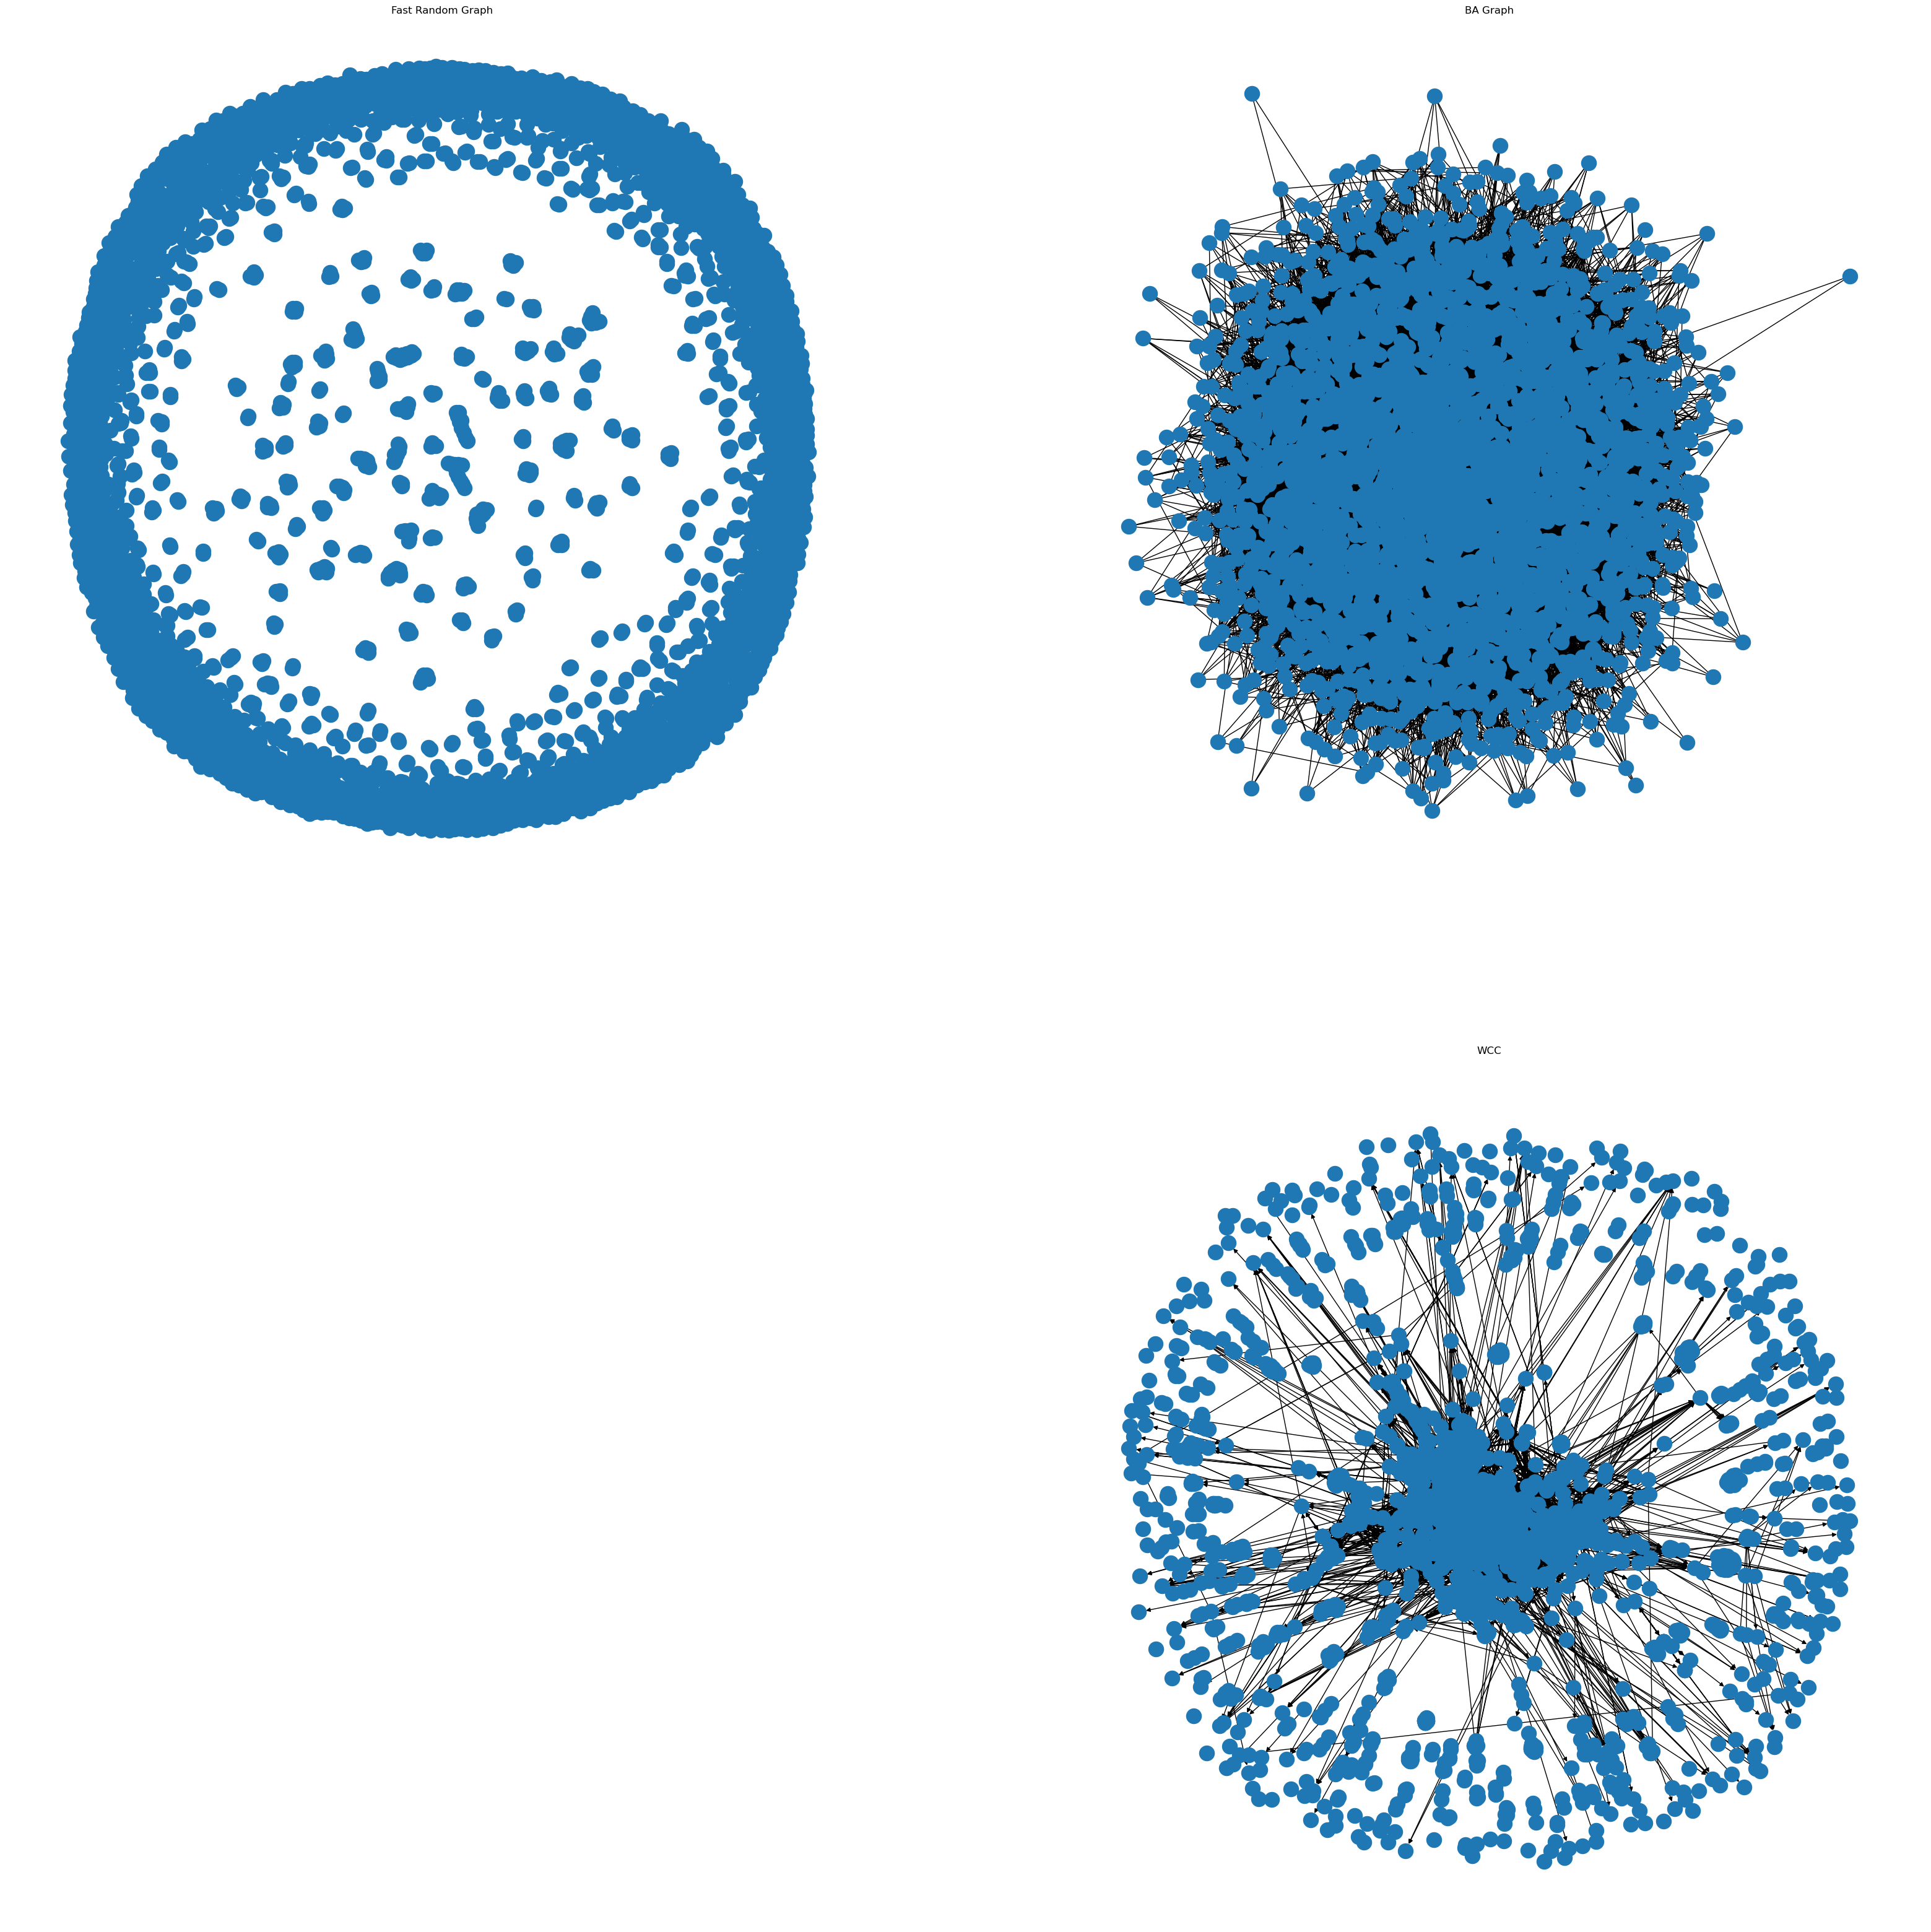

In [19]:
#Getting the top K values - K nodes with the highest page rank values
topk_wcc = list(sorted_pr_wcc.keys())[:3000]
topk_fr= list(sorted_pr_fast_random_graph.keys())[:3000]
topk_ba = list(sorted_pr_ba_graph.keys())[:3000]

#Creating subgraph from the largest WCC, Random Graph and BA graph
wcc_g_k = wcc.subgraph(topk_wcc)
frg_k = fast_random_graph.subgraph(topk_fr)
ba_g_k = ba_graph.subgraph(topk_ba)

#Creating the plot and plotting the 3 graphs
plt.figure(figsize=(40, 40))

plt.subplot(221).set_title("Fast Random Graph")
nx.draw(frg_k)

plt.subplot(222).set_title("BA Graph")
nx.draw(ba_g_k)

plt.subplot(224).set_title("WCC")
nx.draw(wcc_g_k)

plt.show()